   
   # Netflix EDA

#####  Table of Contents
1. Content Type on Netflix
2. Original Release Year
3. Content From Different Countries
4. Ratings
5. Imdb Score
6. Top Genres
7. Cast



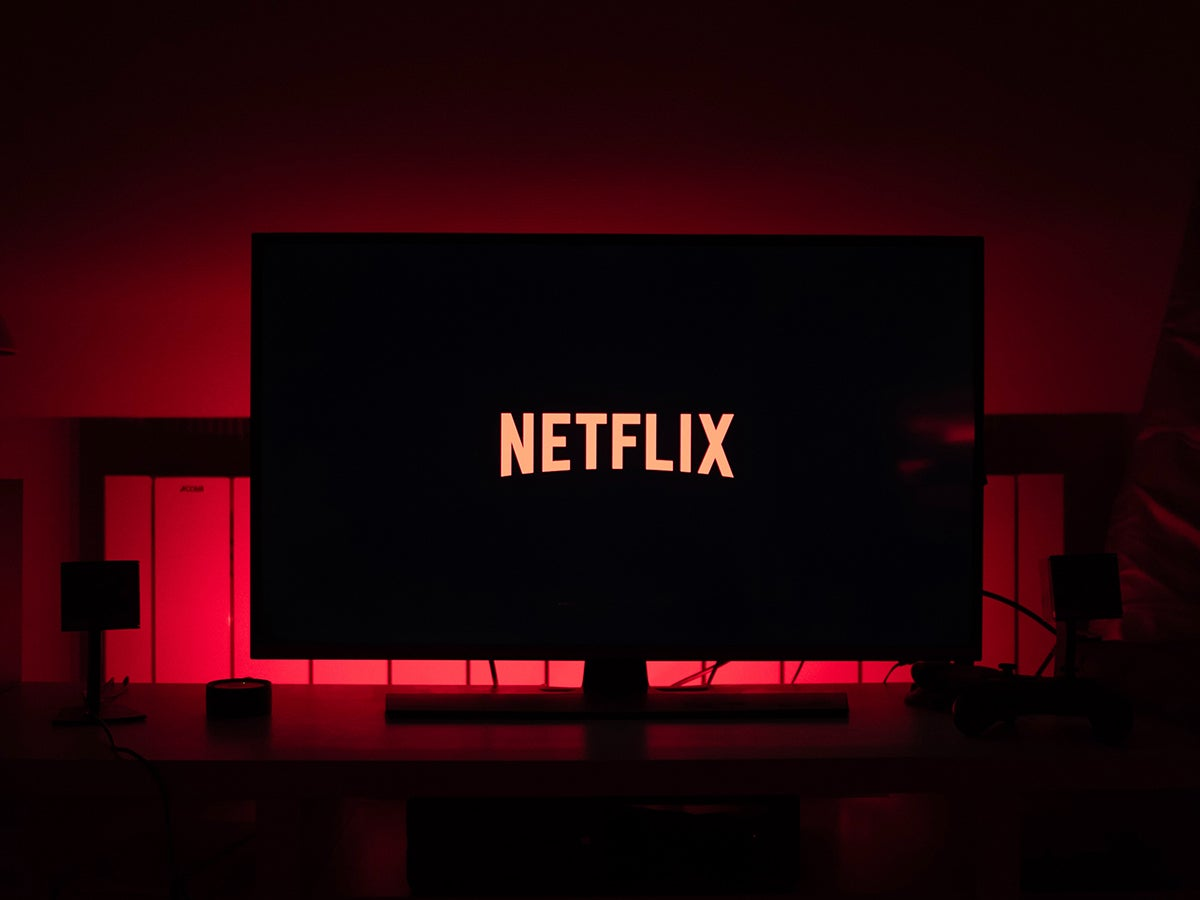

In [1]:
from IPython.display import Image
Image("net.jpg")

## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the data by importing dataset

In [3]:
df=pd.read_csv("netflixData.csv")
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


# Data Info

dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
Show Id               5967 non-null object
Title                 5967 non-null object
Description           5967 non-null object
Director              3903 non-null object
Genres                5967 non-null object
Cast                  5437 non-null object
Production Country    5408 non-null object
Release Date          5964 non-null float64
Rating                5963 non-null object
Duration              5964 non-null object
Imdb Score            5359 non-null object
Content Type          5967 non-null object
Date Added            4632 non-null object
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


As we can see in the output, the summary includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis

In [5]:
df.describe()

,Release Date
count,5964.000000
mean,2015.643863
std,7.257391
min,1925.000000
25%,2015.000000
50%,2018.000000
75%,2019.000000
max,2021.000000


# Let's find the missing values

In [6]:
df.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

Here we can see there is missing values in Director, Cast,Production Country, Release Date, rating,Duration,Imdb score,Date Added. There are too null values in the dataset

# identifying datatypes

store numerical and categorical column in two different variables. It comes handy during visualizaion.

we will use undocumented function _get_numeric_data() to filter only numeric columns

In [7]:
numeric_col=df._get_numeric_data().columns.tolist()
category_col=set(df.columns)-set(numeric_col)
print(numeric_col,category_col)

['Release Date'] {'Duration', 'Date Added', 'Production Country', 'Show Id', 'Content Type', 'Cast', 'Title', 'Genres', 'Description', 'Director', 'Rating', 'Imdb Score'}


# Now impute the missing Value
In this we replace the missing values by using mean and mode when we have text data type we use the mode and when we have numeric data type we use the average of the values.

In [8]:
for i in numeric_col:
    df[i].fillna(df[i].mode()[0],inplace=True)
for i in category_col:
    df[i].fillna(df[i].mode()[0], inplace=True)
    


In [9]:
df.isnull().sum()

Show Id               0
Title                 0
Description           0
Director              0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
Date Added            0
dtype: int64

Now we can see that there is no missing value now in our dataset

## Checking or analysing content type on Netflix 

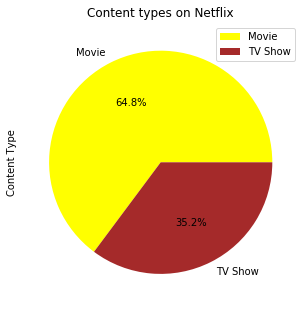

In [10]:
contentcount=df['Content Type'].value_counts()
contentcount.plot(kind="pie",autopct='%1.1f%%',legend=True,title="Content types on Netflix",colors=["Yellow","brown"],figsize=(5,10))

As we can see there is movie content type is maximum on Netflix as compare to TVshow

In [11]:
df['Release Date']=df["Release Date"].astype(int)
contentadded=df.groupby(['Content Type','Release Date'])["Release Date"].count().unstack("Content Type")

In [12]:
contentadded=contentadded.sort_values(ascending=True,by='Release Date')

Text(0, 0.5, 'count of Movies/TV show')

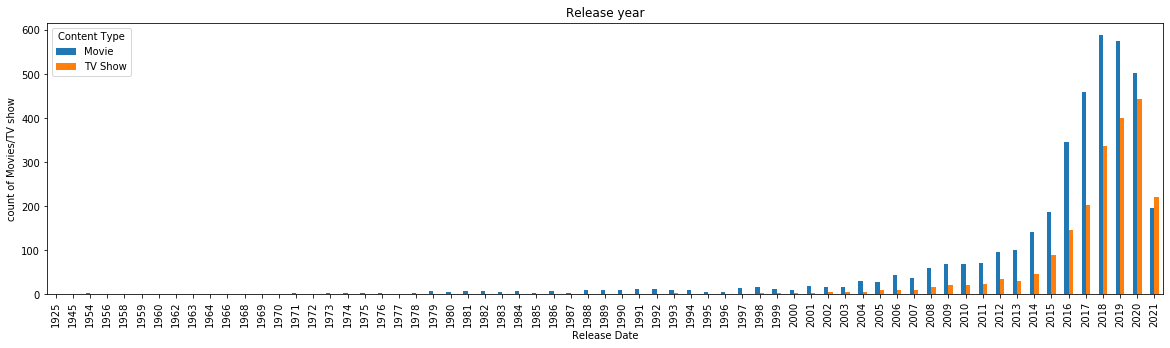

In [13]:
contentadded.plot(kind="bar",figsize=(20,5),title="Release year").set_ylabel('count of Movies/TV show')

# content from different countries

C:\Users\MY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


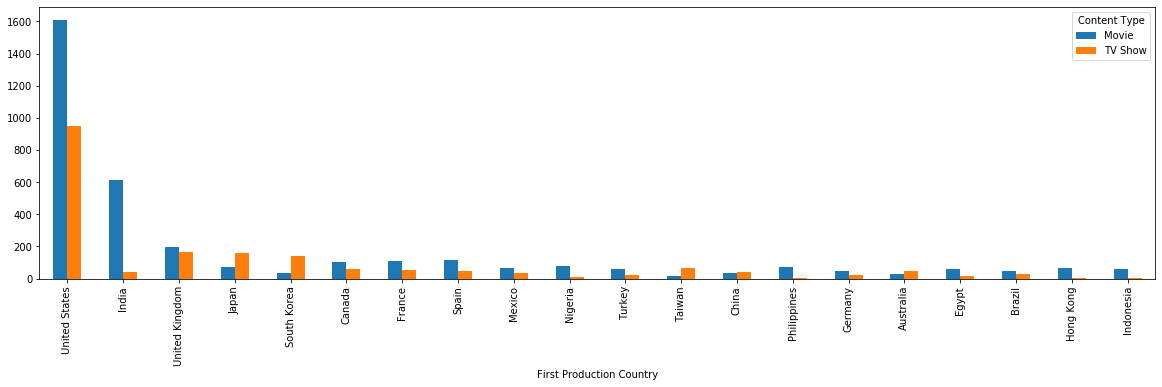

In [14]:
# There are multi countries in a single column so we create another column that will store only the first country.
df['First Production Country'] = df['Production Country'].str.split(',', expand=True)[0]
countrygrouped=df.groupby(['Content Type','First Production Country'])['First Production Country'].count().unstack("Content Type")
countrygrouped.column=['Movie','TV Show']
countrygrouped['Total'] = countrygrouped["Movie"] + countrygrouped["TV Show"]
countrygrouped = countrygrouped.sort_values(ascending=False, by='Total')
countrygrouped[:20].plot(kind="bar",y=["Movie","TV Show"],figsize=(20, 5))


# Aanalysis on rating

Text(0, 0.5, 'Count of Movie/ TV Show')

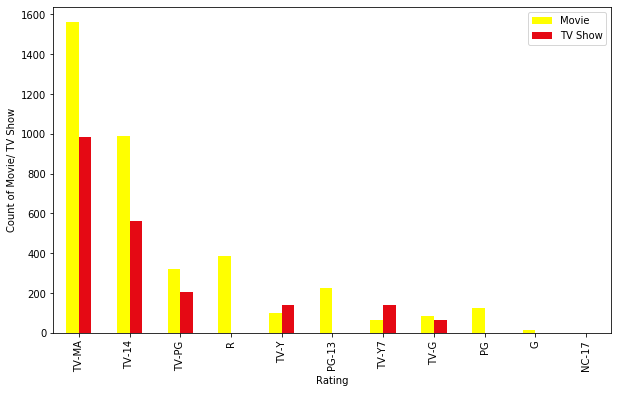

In [15]:
rating_grouped = df.groupby(["Content Type","Rating"])["Rating"].count().unstack('Content Type')
rating_grouped.columns =['Movie', 'TV Show']
rating_grouped['TV Show'] = rating_grouped['TV Show'].fillna(0)
rating_grouped['Total'] = rating_grouped["Movie"] + rating_grouped["TV Show"]
rating_grouped = rating_grouped.sort_values(ascending=False, by='Total')
rating_grouped.plot(kind='bar',y=["Movie","TV Show"],color=["yellow","#e50914"],figsize=(10, 6)).set_ylabel("Count of Movie/ TV Show")

# Top rated content 
## imdb score(>9.0)

In [16]:
df_topRated = df.loc[df["Imdb Score"] >= '9.0/10', ["Title","Imdb Score","Content Type"]]
df_topRated = df_topRated.sort_values(ascending=False, by='Imdb Score').reset_index(drop=True)
df_topRated

,Title,Imdb Score,Content Type
0,Breaking Bad,9.4/10,TV Show
1,Avatar: The Last Airbender,9.3/10,TV Show
2,Our Planet,9.2/10,TV Show
3,Reply 1988,9.2/10,TV Show
4,The Last Dance,9.2/10,TV Show
5,David Attenborough: A Life on Our Planet,9.1/10,Movie
6,Leyla and Mecnun,9.1/10,TV Show
7,The Untamed,9.1/10,TV Show
8,Attack on Titan,9.0/10,TV Show
9,Bo Burnham: Inside,9.0/10,Movie


# Lowest Rated Content (Imdb Score below 2.0)

In [17]:
df_lowestRated = df.loc[df["Imdb Score"] < '2.0/10', ["Title","Imdb Score","Content Type"]]
df_lowestRated = df_lowestRated.sort_values(ascending=True, by='Imdb Score').reset_index(drop=True)
df_lowestRated

,Title,Imdb Score,Content Type
0,Aerials,1.3/10,Movie
1,Time to Dance,1.7/10,Movie
2,Himmatwala,1.8/10,Movie
3,5Gang,1.9/10,Movie
4,Cross: Rise of the Villains,1.9/10,Movie


# Top Genres

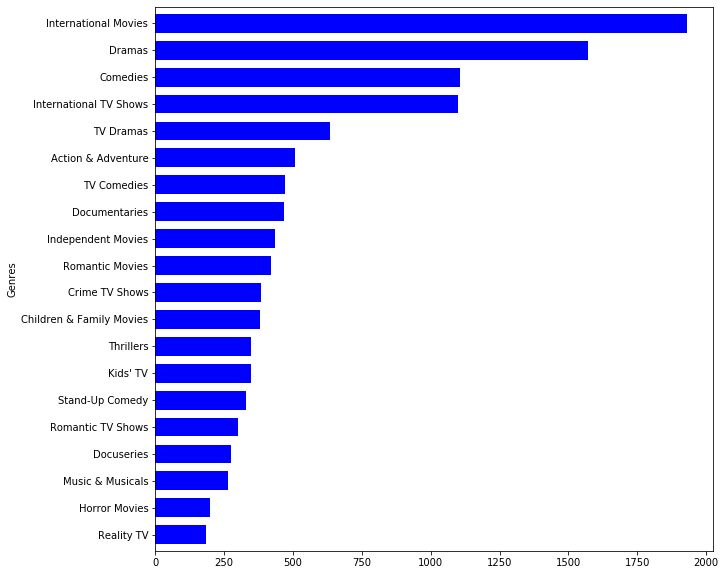

In [20]:
genres = ", ".join(df['Genres']).split(", ")
genres

from collections import Counter
cnt = Counter()
for genre in genres:
    cnt[genre] += 1

topGenres = cnt.most_common(20)
df_topGenres = pd.DataFrame (topGenres, columns = ['Genres','Genres Count'])
df_topGenres.sort_values(ascending=True, by='Genres Count', inplace=True)
df_topGenres.plot.barh(x='Genres',color=["blue"],width=0.7,legend=False, figsize=(10, 10))

# Cast

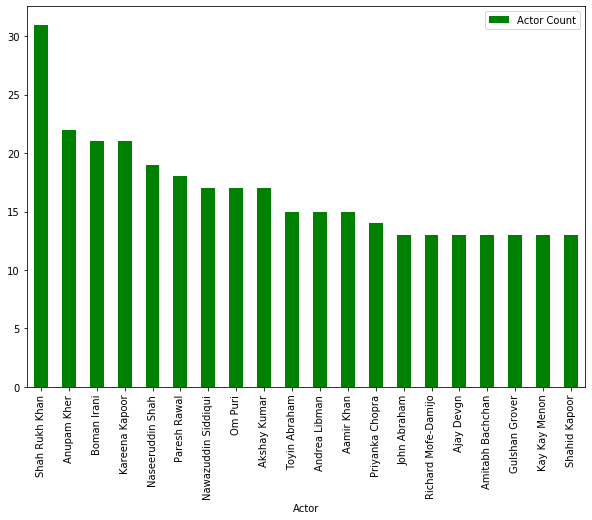

In [21]:
cast_grouped = df.groupby(["Content Type","Cast"])["Cast"].count().unstack('Content Type')
cast_grouped.columns =['Movie', 'TV Show']
cast_grouped_movie = cast_grouped[cast_grouped["Movie"].notnull()].iloc[:,:1]
cast_grouped_movie.reset_index(level='Cast', inplace=True)

movieCast = ", ".join(cast_grouped_movie['Cast']).split(", ")
movieCast

cnt_movieCast = Counter()

for cast in movieCast:
    cnt_movieCast[cast] += 1

movieCast = cnt_movieCast.most_common(20)
df_movieCast = pd.DataFrame (movieCast, columns = ['Actor','Actor Count'])
df_movieCast.sort_values(ascending=False, by='Actor Count', inplace=True)
df_movieCast.plot(kind='bar',x='Actor',color=["green"],figsize=(10, 7))

# top tv actor

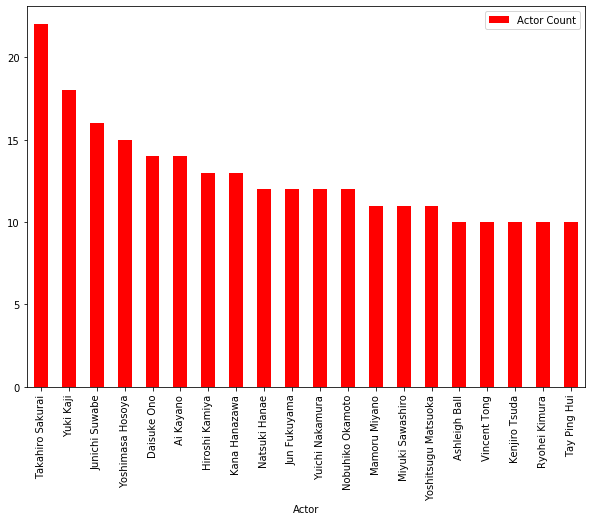

In [23]:
cast_grouped_tv = cast_grouped[cast_grouped["TV Show"].notnull()].iloc[:,:1]
cast_grouped_tv.reset_index(level='Cast', inplace=True)

tvCast = ", ".join(cast_grouped_tv['Cast']).split(", ")
tvCast

cnt_tvCast = Counter()

for cast in tvCast:
    cnt_tvCast[cast] += 1

tvCast = cnt_tvCast.most_common(20)
df_tvCast = pd.DataFrame (tvCast, columns = ['Actor','Actor Count'])
df_tvCast.sort_values(ascending=False, by='Actor Count', inplace=True)
df_tvCast.plot(kind='bar',x='Actor',color=["red"],figsize=(10, 7))